In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
dataset = pd.read_excel('dataset.xlsx')
dataset = pd.DataFrame(dataset)
dataset

,Timestamp,Mohon sebutkan nama atau inisial Anda,Nomer HP yang bisa dihubungi (opsional),Apakah jenis kelamin Anda?,Berapakah usia Anda sekarang?,Di mana domisili Anda sekarang?,Apakah status Anda sekarang?,Apakah pekerjaan utama Anda sekarang?,Berapakah kisaran pendapatan Anda perbulannya?,Berapakah kisaran pengeluaran Anda perbulannya?,...,Servis apa yang paling sering Anda lakukan dengan Ride Hailing app Anda? [3],Servis apa yang paling sering Anda lakukan dengan Ride Hailing app Anda? [4],Servis apa yang paling sering Anda lakukan dengan Ride Hailing app Anda? [5],Apa alasan utama Anda menggunakan Ride Hailing app? [Praktis dan cepat],Apa alasan utama Anda menggunakan Ride Hailing app? [Menghindari kemacetan],Apa alasan utama Anda menggunakan Ride Hailing app? [Tidak memiliki kendaraan pribadi],Apa alasan utama Anda menggunakan Ride Hailing app? [Banyak diskon/potongan harga],Apa alasan utama Anda menggunakan Ride Hailing app? [Banyak teman yang memakai juga],Apakah keterhubungan Ride Hailing app dengan e-Wallet mempengaruhi pilihan Anda?,Seberapa pentingkah keterhubungan antara e-Wallet dan Ride Hailing app bagi Anda dalam menentukan penggunaannya
0,2022-04-08 17:36:21.407,z,NaN,Perempuan,18 - 25 tahun,Bogor,Lajang,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,...,Transportasi,Belanja Bulanan,Pembayaran tagihan,1.0,2.0,4.0,3.0,5.0,Ya,5.0
1,2022-04-08 18:00:11.520,JC,NaN,Laki-Laki,26 - 35 tahun,Jakarta,Lajang,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,...,Pembayaran tagihan,Pemesanan makanan,Transportasi,5.0,4.0,2.0,3.0,1.0,Ya,4.0
2,2022-04-08 18:12:49.543,RH,NaN,Laki-Laki,18 - 25 tahun,Jakarta,Lajang,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,...,Pembayaran tagihan,Pemesanan makanan,Transportasi,5.0,4.0,2.0,1.0,3.0,Ya,4.0
3,2022-04-08 18:29:51.912,tubsul,082121616196,Laki-Laki,18 - 25 tahun,Depok,Lajang,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,...,Pembelian lainnya,Transportasi,Pemesanan makanan,5.0,4.0,1.0,3.0,2.0,Ya,5.0
4,2022-04-08 18:43:27.998,H,-,Perempuan,18 - 25 tahun,Depok,Lajang,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,...,Belanja Bulanan,Pembelian lainnya,Pembayaran tagihan,2.0,4.0,3.0,1.0,5.0,Ya,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2022-04-14 12:37:16.232,M,NaN,Perempuan,18 - 25 tahun,Jakarta,Lajang,Pegawai Swasta,Rp10.000.000 - Rp20.000.000,Rp2.500.000 - Rp5.000.000,...,Pembayaran tagihan,Belanja Bulanan,Pembelian lainnya,1.0,2.0,3.0,4.0,5.0,Ya,5.0
97,2022-04-14 13:56:17.479,mutia_putuhena,081223445581,Perempuan,26 - 35 tahun,Jakarta,Lajang,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,...,Belanja Bulanan,Pemesanan makanan,Transportasi,4.0,5.0,2.0,3.0,1.0,Ya,5.0
98,2022-04-14 14:28:16.813,rony,085643410672,Laki-Laki,26 - 35 tahun,Jakarta,Lajang,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,...,Pembelian lainnya,Pemesanan makanan,Belanja Bulanan,5.0,4.0,3.0,2.0,1.0,Ya,4.0
99,2022-04-14 15:45:09.348,Tan,NaN,Perempuan,18 - 25 tahun,Jakarta,Lajang,Pegawai Negeri,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,...,Belanja Bulanan,Transportasi,Pemesanan makanan,5.0,3.0,1.0,4.0,2.0,Ya,5.0


In [3]:
dataset.columns

Index(['Timestamp', 'Mohon sebutkan nama atau inisial Anda',
       'Nomer HP yang bisa dihubungi (opsional)', 'Apakah jenis kelamin Anda?',
       'Berapakah usia Anda sekarang?', 'Di mana domisili Anda sekarang?',
       'Apakah status Anda sekarang?', 'Apakah pekerjaan utama Anda sekarang?',
       'Berapakah kisaran pendapatan Anda perbulannya?',
       'Berapakah kisaran pengeluaran Anda perbulannya?',
       'Manakah dari e-Wallet ini yang pernah Anda gunakan?',
       'Manakah dari e-Wallet ini yang paling sering Anda gunakan?',
       'Seberapa sering Anda menggunakan e-Wallet dalam seminggu?',
       'Penggunaan apa yang paling sering anda lakukan dengan e-Wallet Anda? [1]',
       'Penggunaan apa yang paling sering anda lakukan dengan e-Wallet Anda? [2]',
       'Penggunaan apa yang paling sering anda lakukan dengan e-Wallet Anda? [3]',
       'Penggunaan apa yang paling sering anda lakukan dengan e-Wallet Anda? [4]',
       'Penggunaan apa yang paling sering anda lakukan den

In [4]:
dataset.describe()

,Apa alasan utama Anda menggunakan e-Wallet? [Penggunaan yang praktis],Apa alasan utama Anda menggunakan e-Wallet? [Kecepatan transaksi],Apa alasan utama Anda menggunakan e-Wallet? [Diterima di berbagi merchant],Apa alasan utama Anda menggunakan e-Wallet? [Banyak diskon/potongan harga],Apa alasan utama Anda menggunakan e-Wallet? [Banyak teman yang memakai juga],Apa alasan utama Anda menggunakan e-Wallet? [Kemudahan channel untuk topup],Apa alasan utama Anda menggunakan e-Wallet? [Desain visual yang menarik],Apa alasan utama Anda menggunakan Ride Hailing app? [Praktis dan cepat],Apa alasan utama Anda menggunakan Ride Hailing app? [Menghindari kemacetan],Apa alasan utama Anda menggunakan Ride Hailing app? [Tidak memiliki kendaraan pribadi],Apa alasan utama Anda menggunakan Ride Hailing app? [Banyak diskon/potongan harga],Apa alasan utama Anda menggunakan Ride Hailing app? [Banyak teman yang memakai juga],Seberapa pentingkah keterhubungan antara e-Wallet dan Ride Hailing app bagi Anda dalam menentukan penggunaannya
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,5.940594,5.198020,4.445545,4.217822,2.762376,3.346535,2.089109,4.158416,3.287129,2.396040,3.099010,2.059406,4.495050
std,1.765343,1.476616,1.292093,1.584954,1.429325,1.506225,1.822630,1.369180,0.993344,1.158268,1.090917,1.412953,0.820046
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,5.000000,4.000000,3.000000,2.000000,2.000000,1.000000,4.000000,3.000000,1.000000,2.000000,1.000000,4.000000
50%,7.000000,6.000000,5.000000,4.000000,3.000000,3.000000,1.000000,5.000000,3.000000,2.000000,3.000000,1.000000,5.000000
75%,7.000000,6.000000,5.000000,5.000000,3.000000,4.000000,2.000000,5.000000,4.000000,3.000000,4.000000,2.000000,5.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
dataset = dataset[['Apakah jenis kelamin Anda?', 'Berapakah usia Anda sekarang?', 'Apakah pekerjaan utama Anda sekarang?', 'Berapakah kisaran pendapatan Anda perbulannya?',
       'Berapakah kisaran pengeluaran Anda perbulannya?', 'Manakah dari e-Wallet ini yang paling sering Anda gunakan?', 'Manakah dari Ride Hailing app ini yang paling sering Anda gunakan?']]

In [6]:
dataset.columns = ['jenis_kelamin', 'usia', 'pekerjaan', 'pendapatan_per_bulan', 'pengeluaran_per_bulan', 'favorite_ewallet', 'favorite_ride_hailing_app']

In [7]:
dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app
0,Perempuan,18 - 25 tahun,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood
1,Laki-Laki,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
2,Laki-Laki,18 - 25 tahun,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab
3,Laki-Laki,18 - 25 tahun,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
4,Perempuan,18 - 25 tahun,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood
...,...,...,...,...,...,...,...
96,Perempuan,18 - 25 tahun,Pegawai Swasta,Rp10.000.000 - Rp20.000.000,Rp2.500.000 - Rp5.000.000,Ovo,Grab
97,Perempuan,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,Ovo,Grab
98,Laki-Laki,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,ShopeePay,Grab
99,Perempuan,18 - 25 tahun,Pegawai Negeri,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Grab


In [8]:
dataset.isna().sum()

jenis_kelamin                0
usia                         0
pekerjaan                    0
pendapatan_per_bulan         0
pengeluaran_per_bulan        0
favorite_ewallet             0
favorite_ride_hailing_app    0
dtype: int64

In [9]:
dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app
0,Perempuan,18 - 25 tahun,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood
1,Laki-Laki,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
2,Laki-Laki,18 - 25 tahun,Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab
3,Laki-Laki,18 - 25 tahun,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
4,Perempuan,18 - 25 tahun,Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood
...,...,...,...,...,...,...,...
96,Perempuan,18 - 25 tahun,Pegawai Swasta,Rp10.000.000 - Rp20.000.000,Rp2.500.000 - Rp5.000.000,Ovo,Grab
97,Perempuan,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,Ovo,Grab
98,Laki-Laki,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,ShopeePay,Grab
99,Perempuan,18 - 25 tahun,Pegawai Negeri,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Grab


In [10]:
dataset['jenis_kelamin'].unique()

array(['Perempuan', 'Laki-Laki'], dtype=object)

In [11]:
dataset['jenis_kelamin'] = dataset['jenis_kelamin'].replace(['Perempuan'],'Wanita')
dataset['jenis_kelamin'] = dataset['jenis_kelamin'].replace(['Laki-Laki'],'Pria')

C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/345257282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['jenis_kelamin'] = dataset['jenis_kelamin'].replace(['Perempuan'],'Wanita')
C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/345257282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['jenis_kelamin'] = dataset['jenis_kelamin'].replace(['Laki-Laki'],'Pria')


In [12]:
dataset['usia'].unique()

array(['18 - 25 tahun', '26 - 35 tahun', '46 - 55 tahun', '> 55 tahun',
       '36 - 45 tahun'], dtype=object)

In [13]:
dataset['pekerjaan'].unique()

array(['Mahasiswa', 'Pegawai Swasta', 'Wirausaha', 'Pegawai Negeri',
       'Pelajar', 'Asisten Rumah tangga', 'Ibu Rumah Tangga',
       'Ibu rumah tangga', 'Mahasiswa S2'], dtype=object)

In [14]:
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Mahasiswa S2'],'Pelajar/Mahasiswa')
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Mahasiswa'],'Pelajar/Mahasiswa')
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Pelajar'],'Pelajar/Mahasiswa')
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Asisten Rumah tangga'],'Lainnya')
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Ibu Rumah Tangga'],'Lainnya')
dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Ibu rumah tangga'],'Lainnya')

C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/601985491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Mahasiswa S2'],'Pelajar/Mahasiswa')
C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/601985491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['pekerjaan'] = dataset['pekerjaan'].replace(['Mahasiswa'],'Pelajar/Mahasiswa')
C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/601985491.py:3: SettingWithCopyWarning: 
A value is trying to be se

In [15]:
dataset['pendapatan_per_bulan'].unique()

array(['Rp0 - Rp2.500.000', 'Rp5.000.000 - Rp10.000.000', '>Rp20.000.000',
       'Rp10.000.000 - Rp20.000.000', 'Rp2.500.000 - Rp5.000.000'],
      dtype=object)

In [16]:
dataset['pengeluaran_per_bulan'].unique()

array(['Rp0 - Rp2.500.000', 'Rp2.500.000 - Rp5.000.000',
       'Rp5.000.000 - Rp10.000.000', 'Rp10.000.000 - Rp20.000.000',
       '>Rp20.000.000'], dtype=object)

In [17]:
dataset['favorite_ewallet'].unique()

array(['ShopeePay', 'GoPay', 'Ovo', 'Dana', 'LinkAja'], dtype=object)

In [18]:
dataset['favorite_ride_hailing_app'].unique()

array(['ShopeeFood', 'Gojek', 'Grab', 'TravelokaEats'], dtype=object)

In [19]:
dataset['pekerjaan'].unique()

array(['Pelajar/Mahasiswa', 'Pegawai Swasta', 'Wirausaha',
       'Pegawai Negeri', 'Lainnya'], dtype=object)

In [20]:
dataset.head()

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app
0,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood
1,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
2,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab
3,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek
4,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood


In [21]:
copy_dataset = dataset.copy()

<p>Pada tahap ini setiap range penghasilan dan pengeluaran akan dimisalkan dengan derajat 1 sampai angka 5 sesuai dengan urutannya dari terendah sampai yang tertinggi. Lalu akan dihitung hasil dari derajat pendapatan dikurangi derajat pengeluarannya untuk dilihat tingkat konsumerisme setiap orang yang sesuai pada tabel berikut:<p>

<table>
  <tr>
    <th>Pendapatan - Pengeluaran</th>
    <th>Tingkat konsumerisme</th>
  </tr>
  <tr>
    <td>4</td>
    <td>Sangat rendah</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Sangat rendah</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Rendah</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Rendah</td>
  </tr>
  <tr>
    <td>0</td>
    <td>Netral</td>
  </tr>
  <tr>
    <td>-1</td>
    <td>Tinggi</td>
  </tr>
  <tr>
    <td>-2</td>
    <td>Tinggi</td>
  </tr>
  <tr>
    <td>-3</td>
    <td>Sangat tinggi</td>
  </tr>
  <tr>
    <td>-4</td>
    <td>Sangat tinggi</td>
  </tr>
</table>

In [22]:
copy_dataset['pendapatan_per_bulan'] = copy_dataset['pendapatan_per_bulan'].replace(['Rp0 - Rp2.500.000'],1)
copy_dataset['pendapatan_per_bulan'] = copy_dataset['pendapatan_per_bulan'].replace(['Rp2.500.000 - Rp5.000.000'],2)
copy_dataset['pendapatan_per_bulan'] = copy_dataset['pendapatan_per_bulan'].replace(['Rp5.000.000 - Rp10.000.000'],3)
copy_dataset['pendapatan_per_bulan'] = copy_dataset['pendapatan_per_bulan'].replace(['Rp10.000.000 - Rp20.000.000'],4)
copy_dataset['pendapatan_per_bulan'] = copy_dataset['pendapatan_per_bulan'].replace(['>Rp20.000.000'],5)

copy_dataset['pengeluaran_per_bulan'] = copy_dataset['pengeluaran_per_bulan'].replace(['Rp0 - Rp2.500.000'],1)
copy_dataset['pengeluaran_per_bulan'] = copy_dataset['pengeluaran_per_bulan'].replace(['Rp2.500.000 - Rp5.000.000'],2)
copy_dataset['pengeluaran_per_bulan'] = copy_dataset['pengeluaran_per_bulan'].replace(['Rp5.000.000 - Rp10.000.000'],3)
copy_dataset['pengeluaran_per_bulan'] = copy_dataset['pengeluaran_per_bulan'].replace(['Rp10.000.000 - Rp20.000.000'],4)
copy_dataset['pengeluaran_per_bulan'] = copy_dataset['pengeluaran_per_bulan'].replace(['>Rp20.000.000'],5)

In [23]:
copy_dataset['tingkat_konsumerisme'] = np.nan

copy_dataset.loc[((copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==4) | (copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==3)), 'tingkat_konsumerisme'] = 'Sangat rendah'
copy_dataset.loc[((copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==2) | (copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==1)), 'tingkat_konsumerisme'] = 'Rendah'
copy_dataset.loc[(copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==0), 'tingkat_konsumerisme'] = 'Netral'
copy_dataset.loc[((copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==-1) | (copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==-2)), 'tingkat_konsumerisme'] = 'Tinggi'
copy_dataset.loc[((copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==-3) | (copy_dataset['pendapatan_per_bulan']-copy_dataset['pengeluaran_per_bulan']==-4)), 'tingkat_konsumerisme'] = 'Sangat tinggi'

In [24]:
copy_dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app,tingkat_konsumerisme
0,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,1,1,ShopeePay,ShopeeFood,Netral
1,Pria,26 - 35 tahun,Pegawai Swasta,3,2,GoPay,Gojek,Rendah
2,Pria,18 - 25 tahun,Pelajar/Mahasiswa,1,1,Ovo,Grab,Netral
3,Pria,18 - 25 tahun,Pelajar/Mahasiswa,3,2,GoPay,Gojek,Rendah
4,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,3,3,ShopeePay,ShopeeFood,Netral
...,...,...,...,...,...,...,...,...
96,Wanita,18 - 25 tahun,Pegawai Swasta,4,2,Ovo,Grab,Rendah
97,Wanita,26 - 35 tahun,Pegawai Swasta,3,3,Ovo,Grab,Netral
98,Pria,26 - 35 tahun,Pegawai Swasta,3,2,ShopeePay,Grab,Rendah
99,Wanita,18 - 25 tahun,Pegawai Negeri,3,2,GoPay,Grab,Rendah


In [25]:
dataset['tingkat_konsumerisme'] = copy_dataset['tingkat_konsumerisme'].copy()
dataset.head()

C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/3756106840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['tingkat_konsumerisme'] = copy_dataset['tingkat_konsumerisme'].copy()


,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app,tingkat_konsumerisme
0,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood,Netral
1,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah
2,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab,Netral
3,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah
4,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood,Netral


In [26]:
categorical = dataset.dtypes==object

In [27]:
clustering_dataset = dataset.copy()

In [28]:
categorical = clustering_dataset.dtypes==object
categorical_cols = clustering_dataset.columns[categorical].tolist()
clustering_dataset[categorical_cols] = clustering_dataset[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
clustering_dataset[categorical_cols].head()
clustering_dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app,tingkat_konsumerisme
0,1,0,3,1,1,4,2,0
1,0,1,2,4,3,1,0,1
2,0,0,3,1,1,3,1,0
3,0,0,3,4,3,1,0,1
4,1,0,3,4,4,4,2,0
...,...,...,...,...,...,...,...,...
96,1,0,2,2,3,3,1,1
97,1,1,2,4,4,3,1,0
98,0,1,2,4,3,4,1,1
99,1,0,1,4,3,1,1,1


In [29]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(clustering_dataset)
    distortions.append(kmeanModel.inertia_)

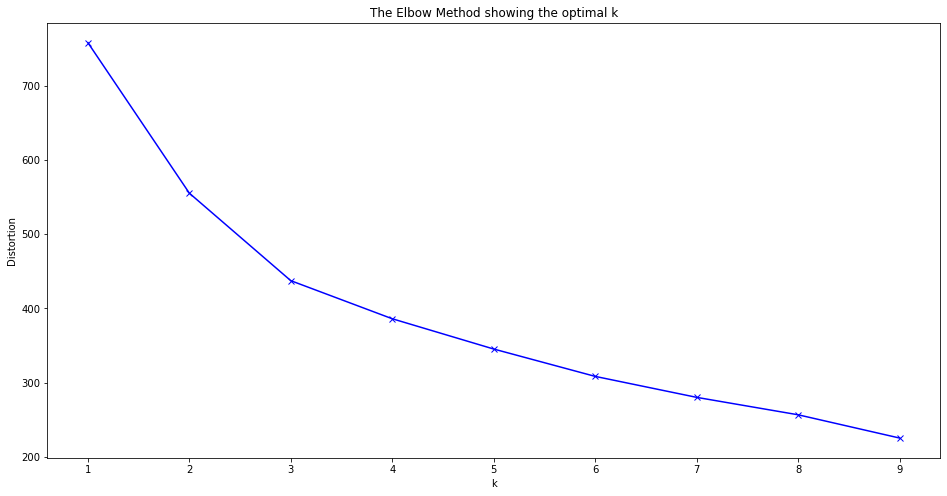

In [30]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<p>Dari metode elbow yang ditampilkan pada grafik diatas, pada saat jumlah cluster sama dengan 3 grafik yang ditampilkan mulai melandai. Oleh karena itu jumlah cluster yang digunakan pada proyek kali ini adalah sebanyak 3 cluster<p>

In [31]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(clustering_dataset)

KMeans(n_clusters=3)

In [32]:
dataset['cluster']=kmeanModel.predict(clustering_dataset)

C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/3349076807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster']=kmeanModel.predict(clustering_dataset)


In [33]:
dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app,tingkat_konsumerisme,cluster
0,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood,Netral,2
1,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah,0
2,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab,Netral,2
3,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah,0
4,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood,Netral,1
...,...,...,...,...,...,...,...,...,...
96,Wanita,18 - 25 tahun,Pegawai Swasta,Rp10.000.000 - Rp20.000.000,Rp2.500.000 - Rp5.000.000,Ovo,Grab,Rendah,1
97,Wanita,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,Ovo,Grab,Netral,1
98,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,ShopeePay,Grab,Rendah,1
99,Wanita,18 - 25 tahun,Pegawai Negeri,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Grab,Rendah,0


In [34]:
dataset['cluster'] = dataset['cluster'].replace(2,3)
dataset['cluster'] = dataset['cluster'].replace(1,2)
dataset['cluster'] = dataset['cluster'].replace(0,1)

C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/1408816580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = dataset['cluster'].replace(2,3)
C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/1408816580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['cluster'] = dataset['cluster'].replace(1,2)
C:\Users\MSI\AppData\Local\Temp/ipykernel_13964/1408816580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [35]:
dataset

,jenis_kelamin,usia,pekerjaan,pendapatan_per_bulan,pengeluaran_per_bulan,favorite_ewallet,favorite_ride_hailing_app,tingkat_konsumerisme,cluster
0,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,ShopeePay,ShopeeFood,Netral,3
1,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah,1
2,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp0 - Rp2.500.000,Rp0 - Rp2.500.000,Ovo,Grab,Netral,3
3,Pria,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Gojek,Rendah,1
4,Wanita,18 - 25 tahun,Pelajar/Mahasiswa,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,ShopeePay,ShopeeFood,Netral,2
...,...,...,...,...,...,...,...,...,...
96,Wanita,18 - 25 tahun,Pegawai Swasta,Rp10.000.000 - Rp20.000.000,Rp2.500.000 - Rp5.000.000,Ovo,Grab,Rendah,2
97,Wanita,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp5.000.000 - Rp10.000.000,Ovo,Grab,Netral,2
98,Pria,26 - 35 tahun,Pegawai Swasta,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,ShopeePay,Grab,Rendah,2
99,Wanita,18 - 25 tahun,Pegawai Negeri,Rp5.000.000 - Rp10.000.000,Rp2.500.000 - Rp5.000.000,GoPay,Grab,Rendah,1


NameError: name 'wp' is not defined

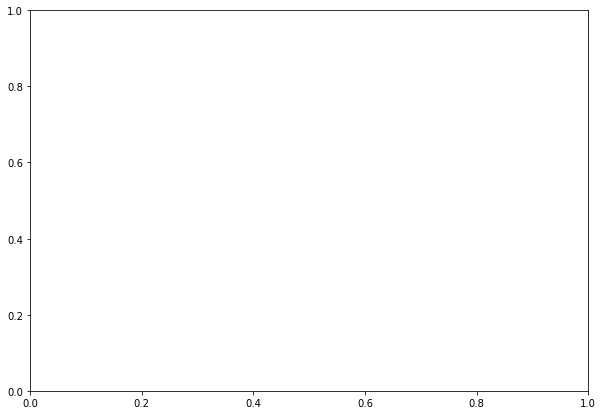

In [37]:
clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']

jml_c1 = int(len(dataset.loc[dataset['cluster'] == 1]))
jml_c2 = int(len(dataset.loc[dataset['cluster'] == 2]))
jml_c3 = int(len(dataset.loc[dataset['cluster'] == 3]))

data = np.array([jml_c1, jml_c2, jml_c3])

colors = ['yellowgreen', 'gold', 'lightskyblue']

explode = (0.05, 0.1, 0.0)

def absolute_value(val):
    a  = np.round(val/100.*data.sum(), 0)
    return int(a)

fig, ax = plt.subplots(figsize =(10, 7))
# ax.pie(data, labels=clusters, colors=colors,
#         autopct=absolute_value, shadow=True, explode=explode)

wedges, texts, autotexts = ax.pie(data,
                                  autopct = absolute_value,
                                  explode = explode,
                                  labels = clusters,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
fig.set_facecolor('white')

ax.legend(wedges, clusters,
          title ="Clusters",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Hasil clustering")


plt.axis('equal')
plt.show()

In [ ]:
dataset.to_excel("clustered_dataset.xlsx")

In [ ]:
cluster1 = dataset.loc[dataset['cluster'] == 1]
cluster1.reset_index(inplace = True)
cluster1.head()

In [ ]:
cluster2 = dataset.loc[dataset['cluster'] == 2]
cluster2.reset_index(inplace = True)
cluster2.head()

In [ ]:
cluster3 = dataset.loc[dataset['cluster'] == 3]
cluster3.reset_index(inplace = True)
cluster3.head()

In [ ]:
cluster1.to_excel('cluster1.xlsx')
cluster2.to_excel('cluster2.xlsx')
cluster3.to_excel('cluster3.xlsx')